In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

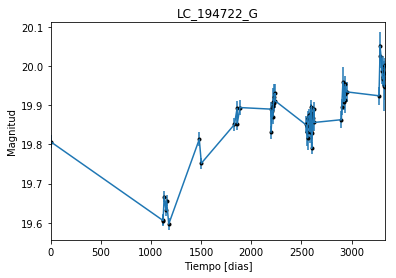

In [2]:
data = np.genfromtxt('LC_194722_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_194722_G')
plt.savefig("LC_194722_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

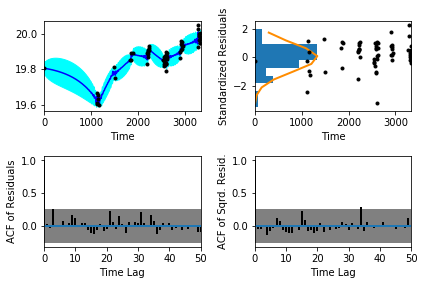

In [5]:
sample.assess_fit()

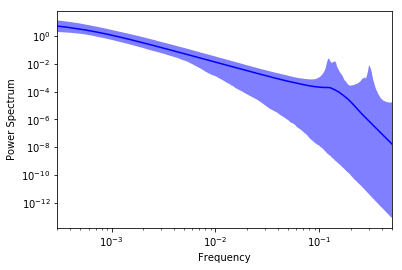

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

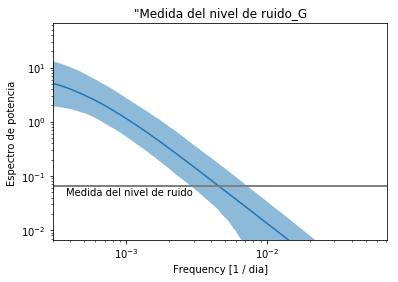

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_194722_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_194722_G')

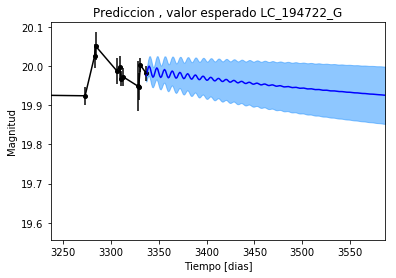

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_194722_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_194722_G')

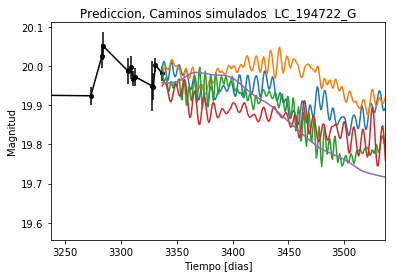

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_194722_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


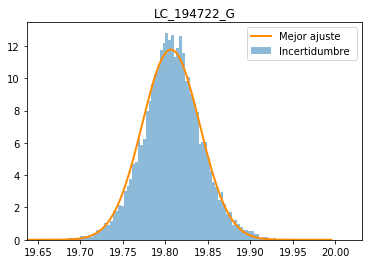

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_194722_G')
plt.savefig("Mejor_ajuste_LC_194722_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_194722_G')

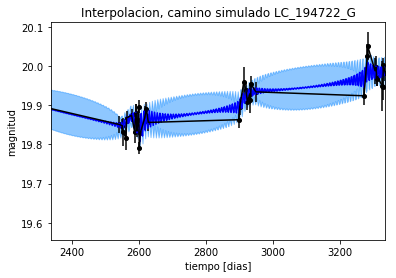

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_194722_G')

Text(0.5,1,'Interpolacion, camino simulado LC_194722_G')

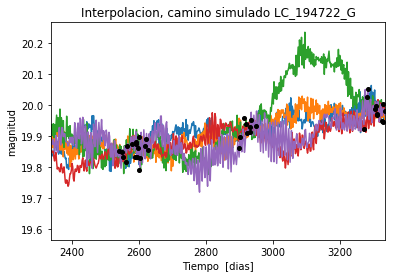

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_194722_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 444.900326208
Median: 0.00504071267451
Standard deviation: 0.0976549353854
68% credibility interval: [ 0.00191398  0.02218183]
95% credibility interval: [ 0.00047797  0.30122801]
99% credibility interval: [  3.48414391e-04   7.56970151e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 421.879744287
Median: 0.00470203143664
Standard deviation: 0.0636881272878
68% credibility interval: [ 0.00155859  0.01702876]
95% credibility interval: [ 0.00040151  0.12657523]
99% credibility interval: [  3.20764521e-04   5.33627292e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 924.424584602
Median: 0.265451741711
Standard deviation

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 326.684962269
Median: 135.028287878
Standard deviation: 2.99230045495
68% credibility interval: [ 131.12688028  137.27543263]
95% credibility interval: [ 127.40729424  138.40696261]
99% credibility interval: [ 125.40526688  138.83627837]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 481.843610688
Median: 1.95465227099
Standard deviation: 1.9032041847
68% credibility interval: [ 0.52145186  4.61543539]
95% credibility interval: [ 0.10105621  6.31717643]
99% credibility interval: [ 0.02637676  7.77021921]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1200.55380434
Median: 1.23315715872
Standard deviation: 7.90987081739
68% credibility interval: [ 0.67355695  5.59203017]
95% credibility interval: [  0.10757558  30.2

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1781.51310884
Median: 1.39310586407e-45
Standard deviation: 1.56892544324e+41
68% credibility interval: [  1.34358236e-87   1.16182157e-29]
95% credibility interval: [  1.49124003e-145   5.31441877e-007]
99% credibility interval: [  7.66034033e-147   5.52112738e-001]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1311.12385963
Median: 19.8351062481
Standard deviation: 0.051119241648
68% credibility interval: [ 19.78465628  19.88225611]
95% credibility interval: [ 19.73302733  19.93647647]
99% credibility interval: [ 19.69798435  19.97942415]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 672.375331157
Median: 0.146709456294
Standard deviation: 0.203946094782
68% credibility interval: [ 0.12247534  0.32469913]
95% credibility interval: [ 0.          0.85548618]
99% credibility interval: [ 0.          0.95720322]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 672.375331157
Median: 0.146709456294
Standard deviation: 0.203946094782
68% credibility interval: [ 0.12247534  0.32469913]
95% credibility interval: [ 0.          0.85548618]
99% credibility interval: [ 0.          0.95720322]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1419.6922721
Median: 0.0
Standard deviation: 0.00012411711827
68% credib

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 326.684962269
Median: 135.028287878
Standard deviation: 2.99230045495
68% credibility interval: [ 131.12688028  137.27543263]
95% credibility interval: [ 127.40729424  138.40696261]
99% credibility interval: [ 125.40526688  138.83627837]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 628.193848369
Median: 0.0105722473419
Standard deviation: 0.00677580542935
68% credibility interval: [ 0.00711985  0.01591451]
95% credibility interval: [ 0.00513656  0.02562594]
99% credibility interval: [ 0.00412167  0.04228378]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 648.337788313
Median: 1.01108678469
Standard deviation: 0.244482513085
68% credibility interval: [ 0.81458211  1.28291665]
95% credibility interval: [ 0.67909301  1.64535401]
99% credibility interval: [ 0.62036374  1.86106733]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 396.018550211
Median: 0.0163074982338
Standard deviation: 0.198728122015
68% credibility interval: [ 0.00196748  0.0936852 ]
95% credibility interval: [  2.40221024e-05   7.40968573e-01]
99% credibility interval: [  5.62084368e-08   1.39779016e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 444.900326208
Median: (-0.0316717318142-0.902986413282j)
Standard deviation: 1.42075721807
68% credibility interval: [-0.13937256-3.02599533j -0.01202589-0.81146216j]
95% credibility interval: [-1.89267139-6.20366275j -0.00300316-2.2779152j ]
99% credibility interval: [ -4.75618373e+00+0.j          -2.18915218e-03-0.82400625j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 421.879744287
Median: (-0.0295437348366+0.561664678012j)
Standard deviation: 1.34245936676
68% credibility interval: [-0.10699483+1.11584509j -0.00979292+0.97266934j]
95% credibility interval: [-0.79529563+0.84278981j -0.00252278+0.89870537j]
99% credibility interval: [ -3.35287916e+00+0.02236224j  -2.01542293e-03+0.93571877j]
Posterior summary for 